# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# **Load and Inspect Data**

In [ ]:
df = pd.read_csv('/content/water_potability.csv')
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [ ]:
print(df.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


# **Handle Missing Values**

In [ ]:
df.fillna(df.mean(), inplace=True)

# **Select Features and Target**



In [ ]:

X = df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
        'Organic_carbon', 'Trihalomethanes', 'Turbidity']]
y = df['Potability']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (2620, 9) (2620,)
Testing set shape: (656, 9) (656,)


# **Train the Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
df.fillna(df.mean(), inplace=True)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error (MSE): 0.23366571408117137
Coefficients: [-2.15640230e-03 -2.37581358e-04  2.01711551e-06  5.14699411e-03
 -1.92408913e-04 -1.58099215e-05 -4.00301776e-03  3.60233357e-04
 -3.90076221e-03]
Intercept: 0.4950563478921211


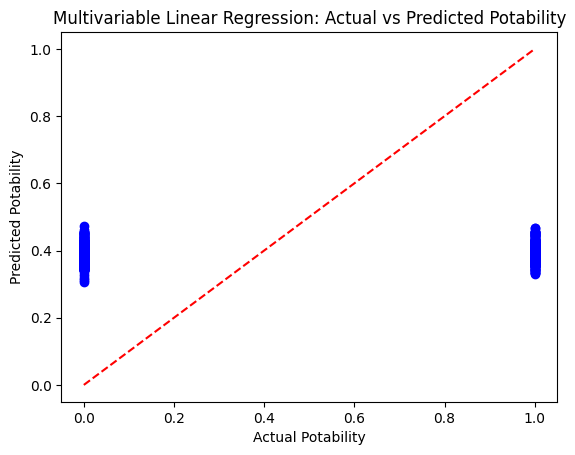

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Ideal prediction line
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')
plt.title('Multivariable Linear Regression: Actual vs Predicted Potability')
plt.show()